## 1- Setup

In [ ]:
!pip install split-folders matplotlib opencv-python spicy

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import random
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2- Keras data generator

In [3]:
datagen = ImageDataGenerator()

In [5]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 13173 images belonging to 6 classes.


In [6]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/validation", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 3010 images belonging to 6 classes.


In [7]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 861 images belonging to 6 classes.


## 3- load the model

In [8]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [9]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [10]:
# define training function
def trainModel(model, epochs, optimizer, batch_size):
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

# 4- train the model

In [11]:
model_history = trainModel(model = model, epochs = 20, optimizer = "Adam", batch_size = 32)

Epoch 1/20
412/412 [==============================] - 6472s 16s/step - loss: 0.9470 - accuracy: 0.6388 - val_loss: 0.3586 - val_accuracy: 0.8857
Epoch 2/20
412/412 [==============================] - 61s 148ms/step - loss: 0.4742 - accuracy: 0.8470 - val_loss: 0.3123 - val_accuracy: 0.9017
Epoch 3/20
412/412 [==============================] - 61s 147ms/step - loss: 0.4109 - accuracy: 0.8787 - val_loss: 0.2954 - val_accuracy: 0.9017
Epoch 4/20
412/412 [==============================] - 61s 147ms/step - loss: 0.3578 - accuracy: 0.8917 - val_loss: 0.2893 - val_accuracy: 0.9013
Epoch 5/20
412/412 [==============================] - 62s 150ms/step - loss: 0.3390 - accuracy: 0.8972 - val_loss: 0.2752 - val_accuracy: 0.9047
Epoch 6/20
412/412 [==============================] - 61s 147ms/step - loss: 0.3375 - accuracy: 0.9011 - val_loss: 0.2875 - val_accuracy: 0.9043
Epoch 7/20
412/412 [==============================] - 61s 148ms/step - loss: 0.3230 - accuracy: 0.9048 - val_loss: 0.2850 - val_ac

5- evaluate the model

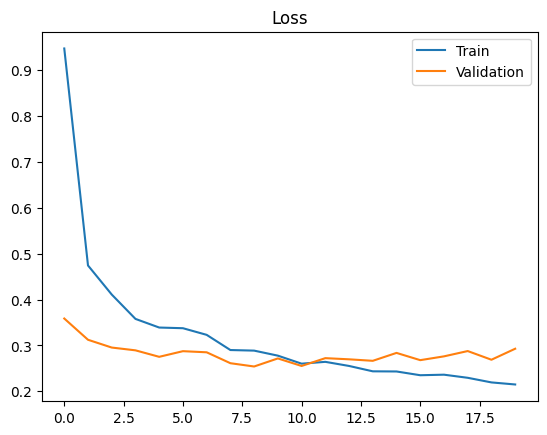

In [12]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

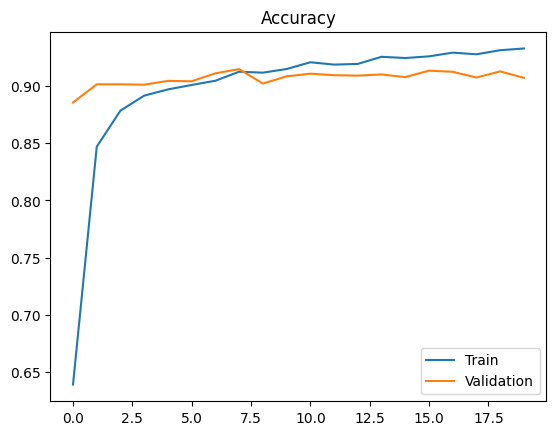

In [13]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

27/27 [==============================] - 389s 15s/step - loss: 0.3196 - accuracy: 0.9059
The test loss is:  0.319611132144928
The best accuracy is:  90.59233665466309


6- save the model

In [19]:
model.save('/content/drive/MyDrive/Image classification/models/resnet50')

In [21]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Image classification/models/RESNET/RESNET_Classifier.json", "w") as json_file:json_file.write(model_json)

model.save("/content/drive/MyDrive/Image classification/RESNET_Classifier.h5")
print("Saved model to disk")

model.save_weights("/content/drive/MyDrive/Image classification/models/RESNET/RESNET_weights.h5")

Saved model to disk


In [23]:
test_dir = '/content/drive/MyDrive/Image classification/dataset/test'
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32, directory=test_dir,
target_size=(224, 224), class_mode='categorical')

Found 861 images belonging to 6 classes.


7- test data

1/1 [==============================] - 0s 26ms/step


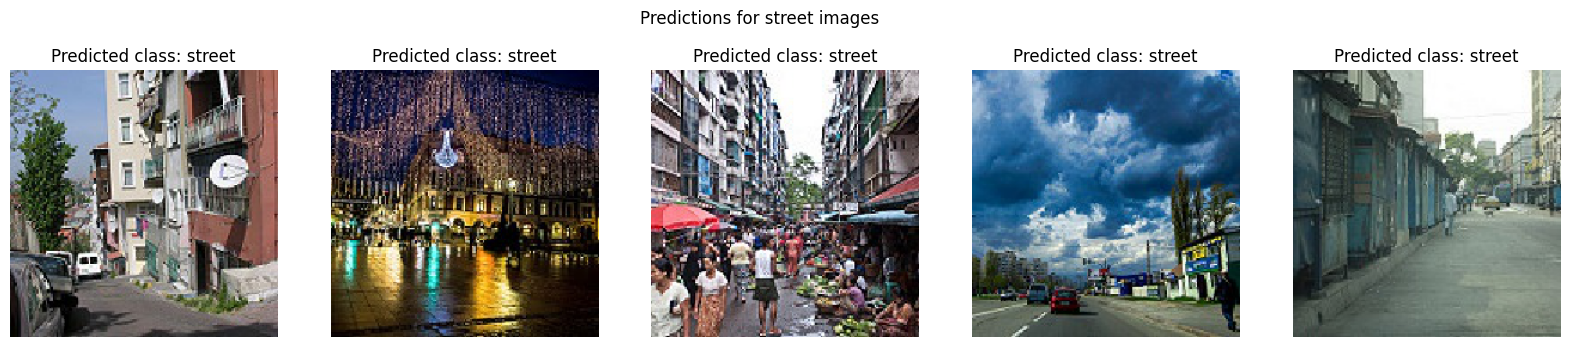

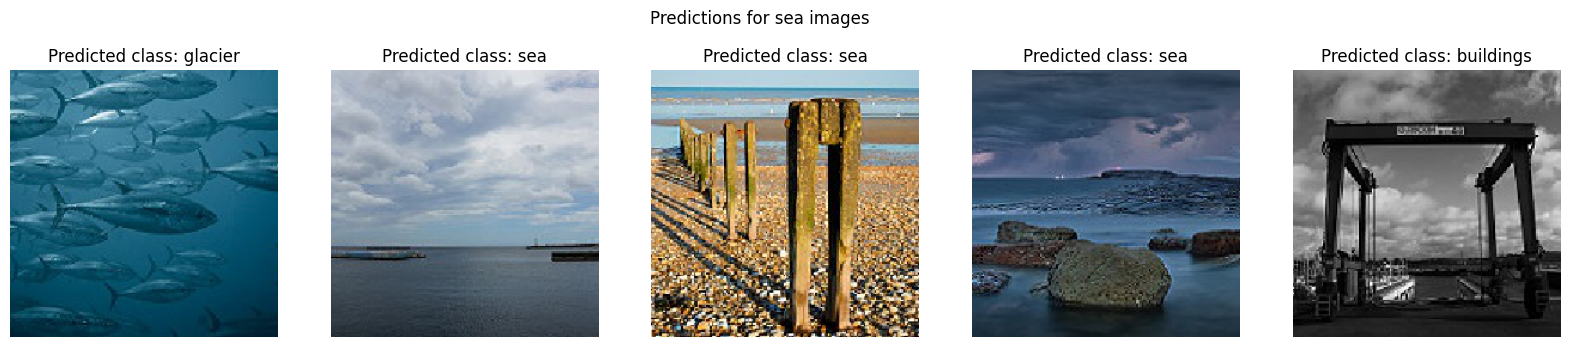

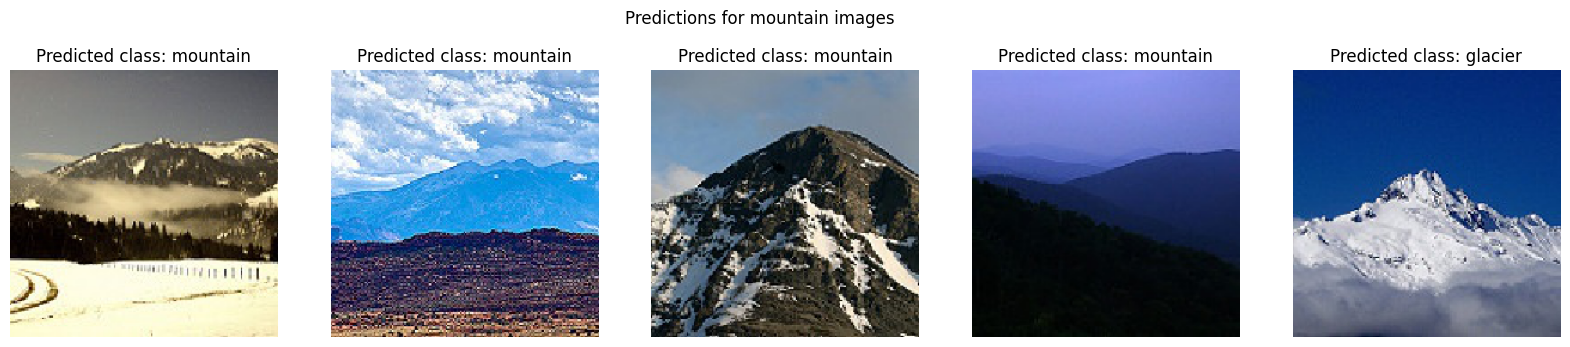

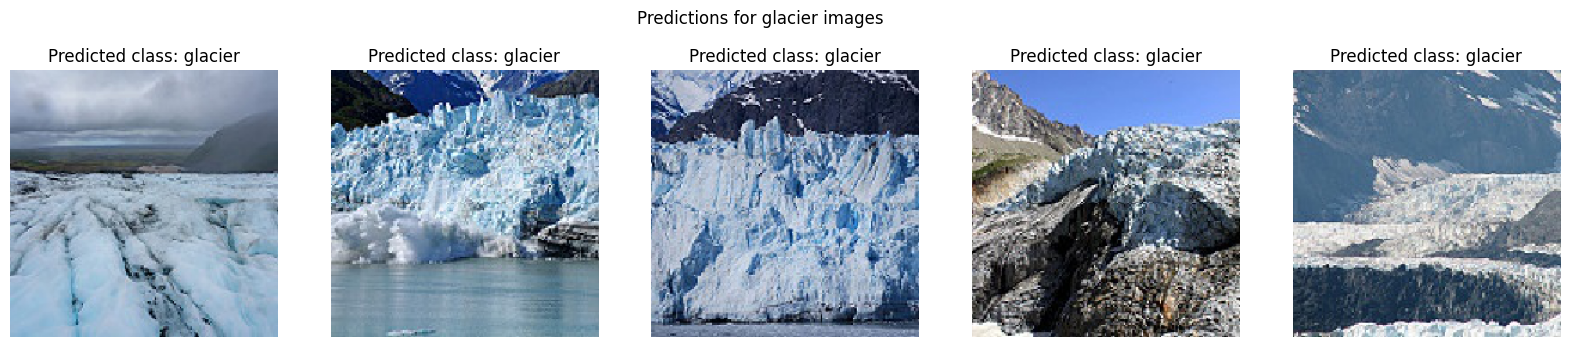

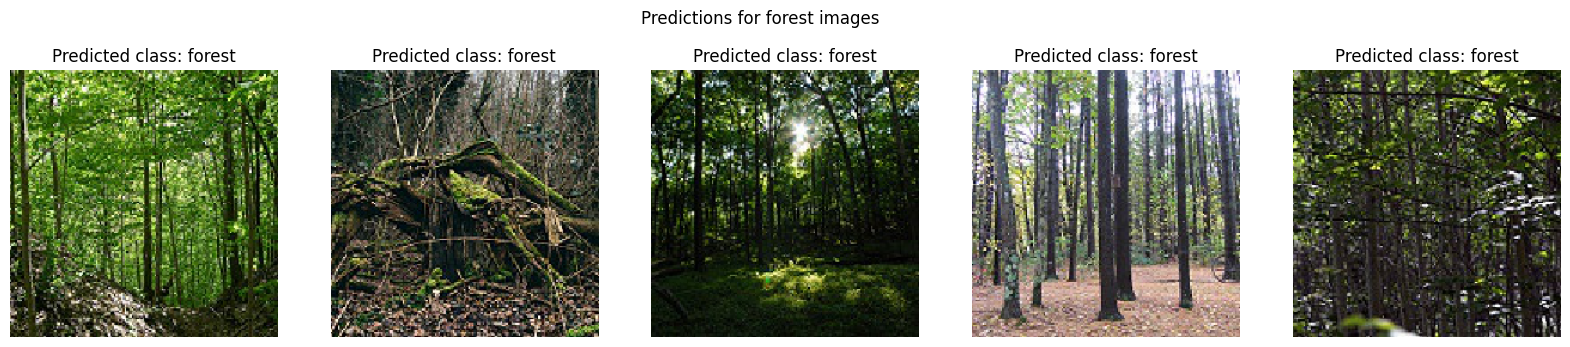

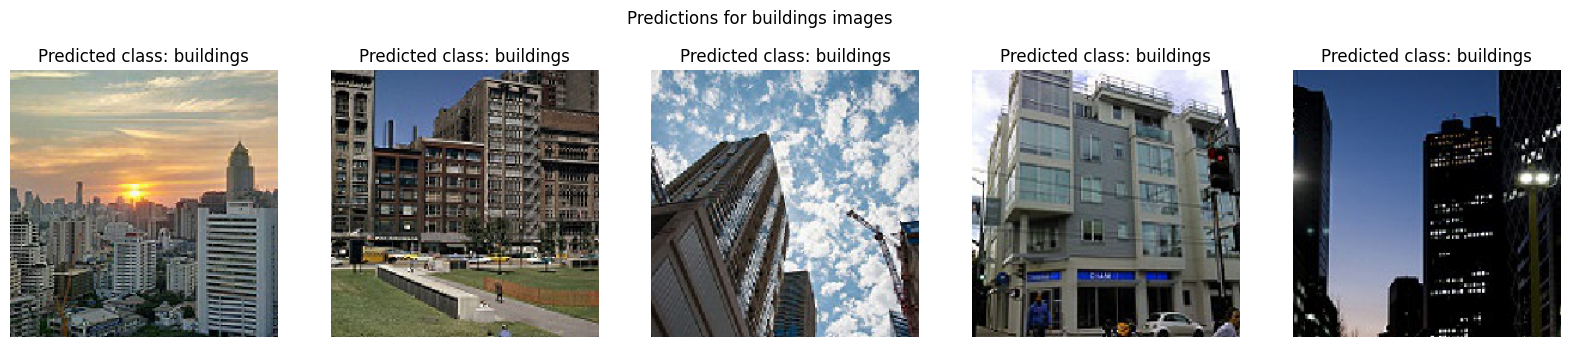

In [47]:
# define classes name
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

# initialize a list to store the predictions
predictions_list = []

# loop over each class folder
for class_name in class_names:

    # set the path to the current class folder
    class_dir = os.path.join(test_dir, class_name)

    # initialize a list to store the image paths
    image_paths = []

    # loop over the first 5 images in the current class folder
    image_names = random.sample(os.listdir(class_dir), k=5)
    image_paths = [os.path.join(class_dir, img) for img in image_names]

    # load the images and convert them to numpy arrays
    images = []
    for image_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    images = np.array(images)

    # generate predictions for the images
    predictions = model.predict(images)

    # generate argmax for predictions
    class_ids = np.argmax(predictions, axis=1)

    # transform classes number into classes name
    predicted_classes = [class_names[class_id] for class_id in class_ids]

    # store the predictions
    predictions_list.append((class_name, image_paths, predicted_classes))

# plot the predictions
for class_name, image_paths, predicted_classes in predictions_list:
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'Predictions for {class_name} images')
    for i, image_path in enumerate(image_paths):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Predicted class: {predicted_classes[i]}')
    plt.show()